Hierarchical Clustering is use to see patterns in a dataset, this will give us more insight about the data. This will result to some dependent variable which we do not know before now.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

In [2]:
data = pd.read_csv('Mall_Customers.csv')
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
X = data.iloc[ : , 1: ].values # you can select columns or rows by putting their indicies into a list,  X = data.iloc[ : , [3, 4] ].values

In [4]:
X

array([['Male', 19, 15, 39],
       ['Male', 21, 15, 81],
       ['Female', 20, 16, 6],
       ['Female', 23, 16, 77],
       ['Female', 31, 17, 40],
       ['Female', 22, 17, 76],
       ['Female', 35, 18, 6],
       ['Female', 23, 18, 94],
       ['Male', 64, 19, 3],
       ['Female', 30, 19, 72],
       ['Male', 67, 19, 14],
       ['Female', 35, 19, 99],
       ['Female', 58, 20, 15],
       ['Female', 24, 20, 77],
       ['Male', 37, 20, 13],
       ['Male', 22, 20, 79],
       ['Female', 35, 21, 35],
       ['Male', 20, 21, 66],
       ['Male', 52, 23, 29],
       ['Female', 35, 23, 98],
       ['Male', 35, 24, 35],
       ['Male', 25, 24, 73],
       ['Female', 46, 25, 5],
       ['Male', 31, 25, 73],
       ['Female', 54, 28, 14],
       ['Male', 29, 28, 82],
       ['Female', 45, 28, 32],
       ['Male', 35, 28, 61],
       ['Female', 40, 29, 31],
       ['Female', 23, 29, 87],
       ['Male', 60, 30, 4],
       ['Female', 21, 30, 73],
       ['Male', 53, 33, 4],
       ['Male

In [5]:
# Country column has strings as it variable we need to encode them
# It transform them into 

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough') # column 0 is what we want to encode and passthrough means leave the others
X = np.array(ct.fit_transform(X)) # np.array makes it a matrix 
X


array([[0.0, 1.0, 19, 15, 39],
       [0.0, 1.0, 21, 15, 81],
       [1.0, 0.0, 20, 16, 6],
       [1.0, 0.0, 23, 16, 77],
       [1.0, 0.0, 31, 17, 40],
       [1.0, 0.0, 22, 17, 76],
       [1.0, 0.0, 35, 18, 6],
       [1.0, 0.0, 23, 18, 94],
       [0.0, 1.0, 64, 19, 3],
       [1.0, 0.0, 30, 19, 72],
       [0.0, 1.0, 67, 19, 14],
       [1.0, 0.0, 35, 19, 99],
       [1.0, 0.0, 58, 20, 15],
       [1.0, 0.0, 24, 20, 77],
       [0.0, 1.0, 37, 20, 13],
       [0.0, 1.0, 22, 20, 79],
       [1.0, 0.0, 35, 21, 35],
       [0.0, 1.0, 20, 21, 66],
       [0.0, 1.0, 52, 23, 29],
       [1.0, 0.0, 35, 23, 98],
       [0.0, 1.0, 35, 24, 35],
       [0.0, 1.0, 25, 24, 73],
       [1.0, 0.0, 46, 25, 5],
       [0.0, 1.0, 31, 25, 73],
       [1.0, 0.0, 54, 28, 14],
       [0.0, 1.0, 29, 28, 82],
       [1.0, 0.0, 45, 28, 32],
       [0.0, 1.0, 35, 28, 61],
       [1.0, 0.0, 40, 29, 31],
       [1.0, 0.0, 23, 29, 87],
       [0.0, 1.0, 60, 30, 4],
       [1.0, 0.0, 21, 30, 73],
       [0.0, 

Find the optimal number of clusters using Dendogram

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


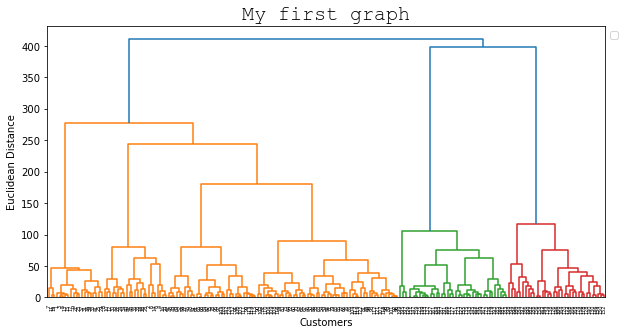

In [9]:
import scipy.cluster.hierarchy as sch 
dendogram = sch.dendrogram(sch.linkage(X, method='ward'))

plt.title('My first graph', fontdict={'fontname':'Courier New', 'fontsize':20 })
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')



plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))
plt.rcParams['figure.figsize'] = 10,5

plt.show()

The largest distances without it touching the next one is 3 between 275 to 375

### Hierarchical Clustering

In [10]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)
y_hc

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

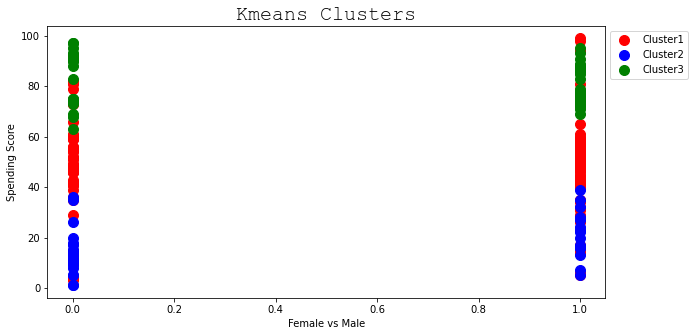

In [16]:
from cProfile import label
from turtle import color


color_list = [
    'red', 'blue', 'green', 'cyan', 'magenta', 'black'
]

for i in range(0, 3):
    plt.scatter(X[y_hc==i, 0],X[y_hc==i, 4], s = 100, color = color_list[i], label=f'Cluster{i+1}')  # row where y_kmeans == i


plt.title('Kmeans Clusters', fontdict={'fontname':'Courier New', 'fontsize':20 })
plt.xlabel('Female vs Male')
plt.ylabel('Spending Score')



plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))
plt.rcParams['figure.figsize'] = 10,5

plt.show()

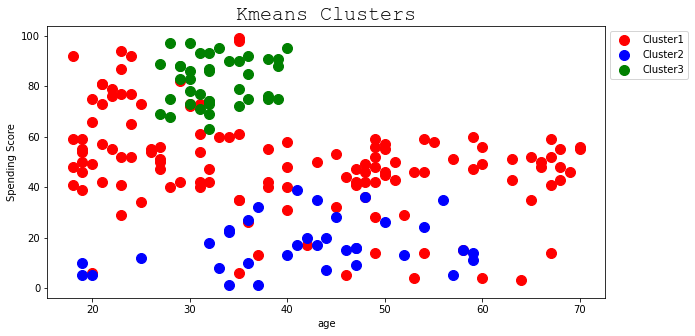

In [15]:
from cProfile import label
from turtle import color


color_list = [
    'red', 'blue', 'green', 'cyan', 'magenta', 'black'
]

for i in range(0, 3):
    plt.scatter(X[y_hc==i, 2],X[y_hc==i, 4], s = 100, color = color_list[i], label=f'Cluster{i+1}')  # row where y_kmeans == i


plt.title('Kmeans Clusters', fontdict={'fontname':'Courier New', 'fontsize':20 })
plt.xlabel('age')
plt.ylabel('Spending Score')



plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))
plt.rcParams['figure.figsize'] = 10,5

plt.show()

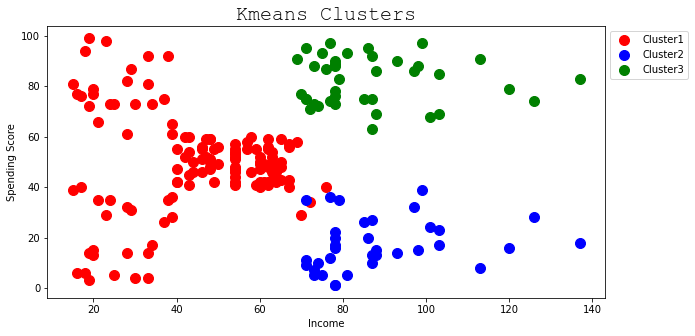

In [19]:
from cProfile import label
from turtle import color


color_list = [
    'red', 'blue', 'green', 'cyan', 'magenta', 'black'
]

for i in range(0, 3):
    plt.scatter(X[y_hc==i, 3],X[y_hc==i, 4], s = 100, color = color_list[i], label=f'Cluster{i+1}')  # row where y_kmeans == i


plt.title('Kmeans Clusters', fontdict={'fontname':'Courier New', 'fontsize':20 })
plt.xlabel('Income')
plt.ylabel('Spending Score')



plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))
plt.rcParams['figure.figsize'] = 10,5

plt.show()